In [1]:
import sys
import re
import numpy as np
import pandas as pd
import pysam
import matplotlib.pyplot as plt
import seaborn as sns
import pysam
import gget

In [2]:
fpath = f"/nfs/turbo/umms-indikar/shared/projects/poreC/data/fastq/p2/scPC96o_3/2024-02-01-scPC96o_3_run2/fastq_pass/barcode01/PAS93920_pass_barcode01_4b64fd13_79b31b3b_12.fastq.gz"

fastq = pysam.FastxFile(fpath)
cutter = "CATG"

res = []

for read in fastq:
    n_frg = read.sequence.count(cutter)
    seq_len = len(read.sequence)

    row = {
        'n_frg' : n_frg,
        'seq_len' : seq_len,
    }
    res.append(row)

res = pd.DataFrame(res)
res.head()

,n_frg,seq_len
0,0,548
1,0,736
2,0,665
3,0,527
4,0,825


In [3]:
res['n_frg'].value_counts()

n_frg
0     3672
1      285
2       30
3        5
4        2
20       1
17       1
6        1
12       1
7        1
5        1
Name: count, dtype: int64

In [4]:
res['n_frg'].value_counts(normalize=True)

n_frg
0     0.91800
1     0.07125
2     0.00750
3     0.00125
4     0.00050
20    0.00025
17    0.00025
6     0.00025
12    0.00025
7     0.00025
5     0.00025
Name: proportion, dtype: float64

<AxesSubplot: xlabel='n_frg', ylabel='seq_len'>

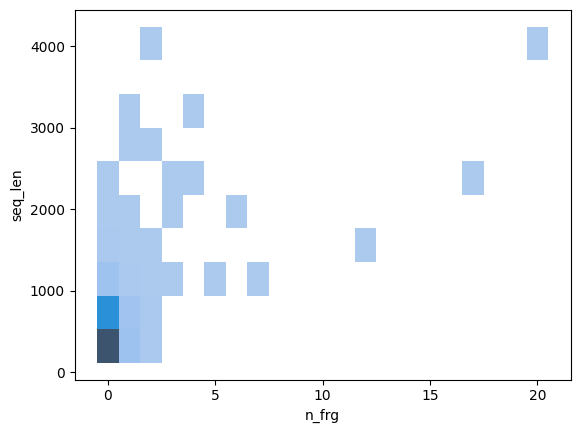

In [5]:
sns.histplot(data=res, 
             x='n_frg',
             y='seq_len',
             bins=(4, 10),
             stat='percent',
             discrete=(True, False),
             )

In [28]:
stop = 4
count = -1
fastq = pysam.FastxFile(fpath)

res = []
for read in fastq:
    n_frg = read.sequence.count(cutter)
    seq_len = len(read.sequence)
    count += 1
    if count == stop:
        break

    print()
    print(f"{n_frg=} {seq_len=}")
    print(read.sequence)
    edf = gget.blast(read.sequence)
    edf['read_name'] = read.name
    res.append(edf)


res = pd.concat(res)
res.head()

Fri Feb 23 14:53:29 2024 INFO Sequence recognized as nucleotide sequence.
Fri Feb 23 14:53:29 2024 INFO BLAST will use program 'blastn' with database 'nt'.



n_frg=0 seq_len=548
ATGTGGCGCCTGACTCATTTCGCGTGTGCTGGTGCTGAAGAAGAGTCTGGTGTTTGTGTTAACCTTTATCTGGCTGTATGATGGTCAGGCCGCAACAGCAAGTCGTTAACACAAACGTCAGCAACTTTCTTCACACACAATATCCACACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTTTTCAGCACCACAATATCAGCACCAACAGAAAGGTTAACGCGAAGACACCGACAACTTATTACTCAGCACCACGATCCAGCACCCAACAGAAAGGTTAACGCGAAGACACCGACAACTTTCTTCAGCACCACAATATCCAGCACGGACGGAAAGGTTGACGCAAAGACACCGACAACTTCTGGGCACGGCAATATCAGCACCAACAGAAAGGTTAACACGAAGACACCGACAACTTTCTTCAGCGCCGCAATATCAGCACCAACAGAAAGGTTAACGCAAAGACACCAACGGTTTCTTCAGCACCACAATATTCAGCACCAACCGAAAGGTTGACGCAAAGACACCGACAACTTTATTCAGCG


Fri Feb 23 14:53:29 2024 INFO BLAST initiated with search ID XHXXTVFR013. Estimated time to completion: 30 seconds.
Fri Feb 23 14:54:01 2024 INFO Retrieving results...
Fri Feb 23 14:54:01 2024 INFO Sequence recognized as nucleotide sequence.
Fri Feb 23 14:54:01 2024 INFO BLAST will use program 'blastn' with database 'nt'.



n_frg=0 seq_len=736
TATGTTTTGTTAGCATTTTACTTCGTTCAGTTACGTATTGCTGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTACTTGCCTGTCGCTCTATCATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCACAATATCAGCACCAACAGAAAGGTTAACACAGAAAGAACACCAACAACTTTTTTCACACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCACAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCAAAGATAGAGCGACAGGCAAGTAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCGCAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCGCAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCAGCAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCAATATCAGCACTAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCGCAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTTTCAGCACCGCAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGAGCAATACGTT


Fri Feb 23 14:54:01 2024 INFO BLAST initiated with search ID XHXYTFEB013. Estimated time to completion: 30 seconds.
Fri Feb 23 14:54:32 2024 INFO Retrieving results...
Fri Feb 23 14:54:32 2024 INFO Sequence recognized as nucleotide sequence.
Fri Feb 23 14:54:32 2024 INFO BLAST will use program 'blastn' with database 'nt'.



n_frg=0 seq_len=665
ATGTCTGCTTCGTTCAGTTACGTATTGCTGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGGAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGAAAGTTTGTCGGTGTCTTTGTGTTAACCTACTTGCCTGTCGCTCTATCTTCAGCACCAACGGAAGGGTTGACGCAAAGACACCGACAACTTTCTTCAGCACCGCAATATCAGCACCAACAGAAAGGTTGACGCAAAGACACCGACAACTTTCTTCAGCACAATGTAGGCACCAACAGAAAAGGCATACGCAAAGACACCAACAACTTATTTCAGCACCGCAATCTGGCCGACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCGCAATATCGGCGCCAACAGAAAGGTTAACACAAAGACACCAGCACCAGCAATACGTT


Fri Feb 23 14:54:33 2024 INFO BLAST initiated with search ID XHXZSX4K013. Estimated time to completion: 30 seconds.
Fri Feb 23 14:55:04 2024 INFO Retrieving results...
Fri Feb 23 14:55:04 2024 INFO Sequence recognized as nucleotide sequence.
Fri Feb 23 14:55:04 2024 INFO BLAST will use program 'blastn' with database 'nt'.



n_frg=0 seq_len=527
GTTGTGCCTGTTGCTTCGTTCGTTCATCTGCTCTTTGTGTTAACCTACTTGCCTGTCGCTCTATCTTCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCACAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCACAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCGCAATATCAGCACCTACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCGCAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTACGCCGCCACCGCTTACTTAACGCAATATGACGCGAACAAAGCTAACGCAAAAACACCGACAACTTTCTTCAGCACCACAATATCAGCACCAACAGAAAGGTTAACACAGAGACACCGACAACTTTCTTCAGCACCGCAATATCAGCACCAACAGAAAGGTTAACAGGATTCATTCCCACAGTA


Fri Feb 23 14:55:05 2024 INFO BLAST initiated with search ID XHY0SJ7X016. Estimated time to completion: 30 seconds.
Fri Feb 23 14:55:35 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession,read_name
0,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,104.0,456.0,55%,3.000000e-17,95.45%,4379,MN135767.1,0ae815fa-92c7-4af0-a36d-8683d9225b03
1,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,91.6,382.0,44%,2.000000e-13,92.42%,4114,MN135768.1,0ae815fa-92c7-4af0-a36d-8683d9225b03
2,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,75.0,199.0,25%,2.000000e-08,87.69%,4151,MN135764.1,0ae815fa-92c7-4af0-a36d-8683d9225b03
3,[Candida] auris isolate B12043 chromosome 5,[Candida] auris,NaN,498019,71.3,137.0,14%,3.000000e-07,97.56%,1029387,CP050670.1,0ae815fa-92c7-4af0-a36d-8683d9225b03
4,[Candida] auris isolate B12043 chromosome 2,[Candida] auris,NaN,498019,69.4,200.0,14%,1.000000e-06,97.50%,2565939,CP050667.1,0ae815fa-92c7-4af0-a36d-8683d9225b03


In [7]:
res['Scientific Name'].value_counts()

Scientific Name
Trichoderma virens FT-333                          315
uncultured Parasutterella sp.                      277
[Candida] auris                                    225
Lactiplantibacillus carotarum                      135
Enterobacter hormaechei                             89
uncultured Turicimonas sp.                          88
Luteimonas granuli                                  45
Streptomyces koelreuteriae                          45
Nephridiophagidae sp.                               27
Staphylococcus pseudintermedius                     27
Heterocephalus glaber                               26
Severe acute respiratory syndrome coronavirus 2     18
Hebeloma theobrominum                               12
Chrysodeixis includens                               8
Staphylococcus phage S-CoN_Ph14                      4
Mucor sp.                                            4
Saccharomyces uvarum                                 3
Mycolicibacterium novocastrense                  

In [8]:
res['Description'].values[0]

'Uncultured Parasutterella sp. clone MinION_consensus13 16S ribosomal RNA gene, partial sequence; 16S-23S ribosomal RNA intergenic spacer, complete sequence; and 23S ribosomal RNA gene, partial sequence'

In [9]:
res.head()

,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession,read_name
0,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,104.0,456.0,55%,3.000000e-17,95.45%,4379,MN135767.1,0ae815fa-92c7-4af0-a36d-8683d9225b03
1,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,91.6,382.0,44%,2.000000e-13,92.42%,4114,MN135768.1,0ae815fa-92c7-4af0-a36d-8683d9225b03
2,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,75.0,199.0,25%,2.000000e-08,87.69%,4151,MN135764.1,0ae815fa-92c7-4af0-a36d-8683d9225b03
3,[Candida] auris isolate B12043 chromosome 5,[Candida] auris,NaN,498019,71.3,137.0,14%,3.000000e-07,97.56%,1029387,CP050670.1,0ae815fa-92c7-4af0-a36d-8683d9225b03
4,[Candida] auris isolate B12043 chromosome 2,[Candida] auris,NaN,498019,69.4,200.0,14%,1.000000e-06,97.50%,2565939,CP050667.1,0ae815fa-92c7-4af0-a36d-8683d9225b03


In [21]:
stop = 45
count = -1
fastq = pysam.FastxFile(fpath)

res = []
for read in fastq:
    seq = read.sequence
    quals = read.get_quality_array()
    
    print(seq)
    print()
    print(quals)

    break

ATGTGGCGCCTGACTCATTTCGCGTGTGCTGGTGCTGAAGAAGAGTCTGGTGTTTGTGTTAACCTTTATCTGGCTGTATGATGGTCAGGCCGCAACAGCAAGTCGTTAACACAAACGTCAGCAACTTTCTTCACACACAATATCCACACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTTTTCAGCACCACAATATCAGCACCAACAGAAAGGTTAACGCGAAGACACCGACAACTTATTACTCAGCACCACGATCCAGCACCCAACAGAAAGGTTAACGCGAAGACACCGACAACTTTCTTCAGCACCACAATATCCAGCACGGACGGAAAGGTTGACGCAAAGACACCGACAACTTCTGGGCACGGCAATATCAGCACCAACAGAAAGGTTAACACGAAGACACCGACAACTTTCTTCAGCGCCGCAATATCAGCACCAACAGAAAGGTTAACGCAAAGACACCAACGGTTTCTTCAGCACCACAATATTCAGCACCAACCGAAAGGTTGACGCAAAGACACCGACAACTTTATTCAGCG

array('B', [4, 5, 6, 6, 3, 3, 2, 3, 3, 3, 2, 3, 4, 3, 3, 2, 2, 2, 3, 4, 5, 5, 4, 4, 4, 3, 3, 3, 4, 8, 4, 5, 5, 6, 15, 15, 9, 9, 9, 8, 12, 14, 7, 8, 6, 7, 8, 8, 6, 5, 6, 9, 8, 7, 6, 7, 12, 12, 12, 19, 17, 18, 24, 20, 18, 18, 12, 8, 12, 7, 7, 5, 5, 5, 4, 7, 6, 5, 5, 4, 4, 7, 7, 7, 7, 4, 3, 3, 4, 5, 6, 7, 7, 4, 3, 4, 4, 4, 4, 8, 6, 6, 10, 12, 11, 12, 14, 15, 18, 22, 6, 5, 5, 7, 17, 14, 6, 5, 4, 4, 4, 4, 4, 5, 9, 9, 7, 5, 3, 5, 7, 8, 9, 7, 6, 7, 3, 3

In [22]:
np.mean(quals)

12.364963503649635

<AxesSubplot: ylabel='Count'>

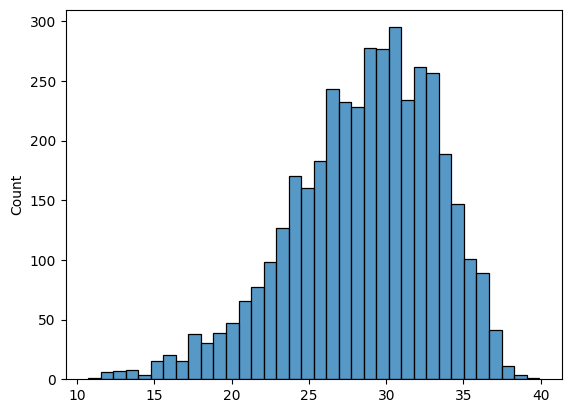

In [26]:
fpath = f"/nfs/turbo/umms-indikar/shared/projects/poreC/data/fastq/p2/scPC96o_2/Run2/fastq_pass/barcode01/PAS87012_pass_barcode01_a3fcacfb_67c73f7f_0.fastq.gz"

stop = 45
count = -1
fastq = pysam.FastxFile(fpath)

res = []
for read in fastq:
    seq = read.sequence
    quals = read.get_quality_array()
    res.append(np.mean(quals))


sns.histplot(res)

<AxesSubplot: ylabel='Count'>

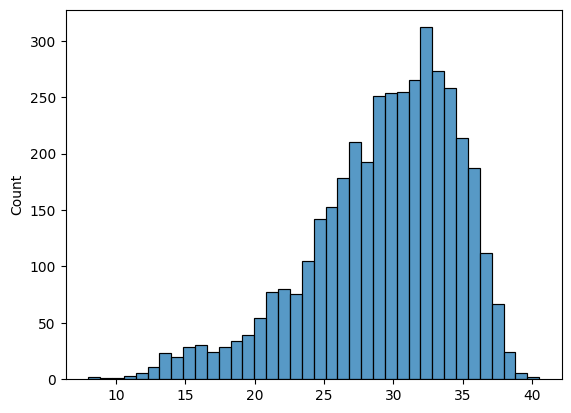

In [27]:
fpath = f"/nfs/turbo/umms-indikar/shared/projects/poreC/data/fastq/p2/scPC96o_3/2024-02-01-scPC96o_3_run2/fastq_pass/barcode01/PAS93920_pass_barcode01_4b64fd13_79b31b3b_12.fastq.gz"

stop = 45
count = -1
fastq = pysam.FastxFile(fpath)

res = []
for read in fastq:
    seq = read.sequence
    quals = read.get_quality_array()
    res.append(np.mean(quals))

sns.histplot(res)